# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [6]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [7]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [8]:
df['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

<Axes: xlabel='count', ylabel='Disease'>

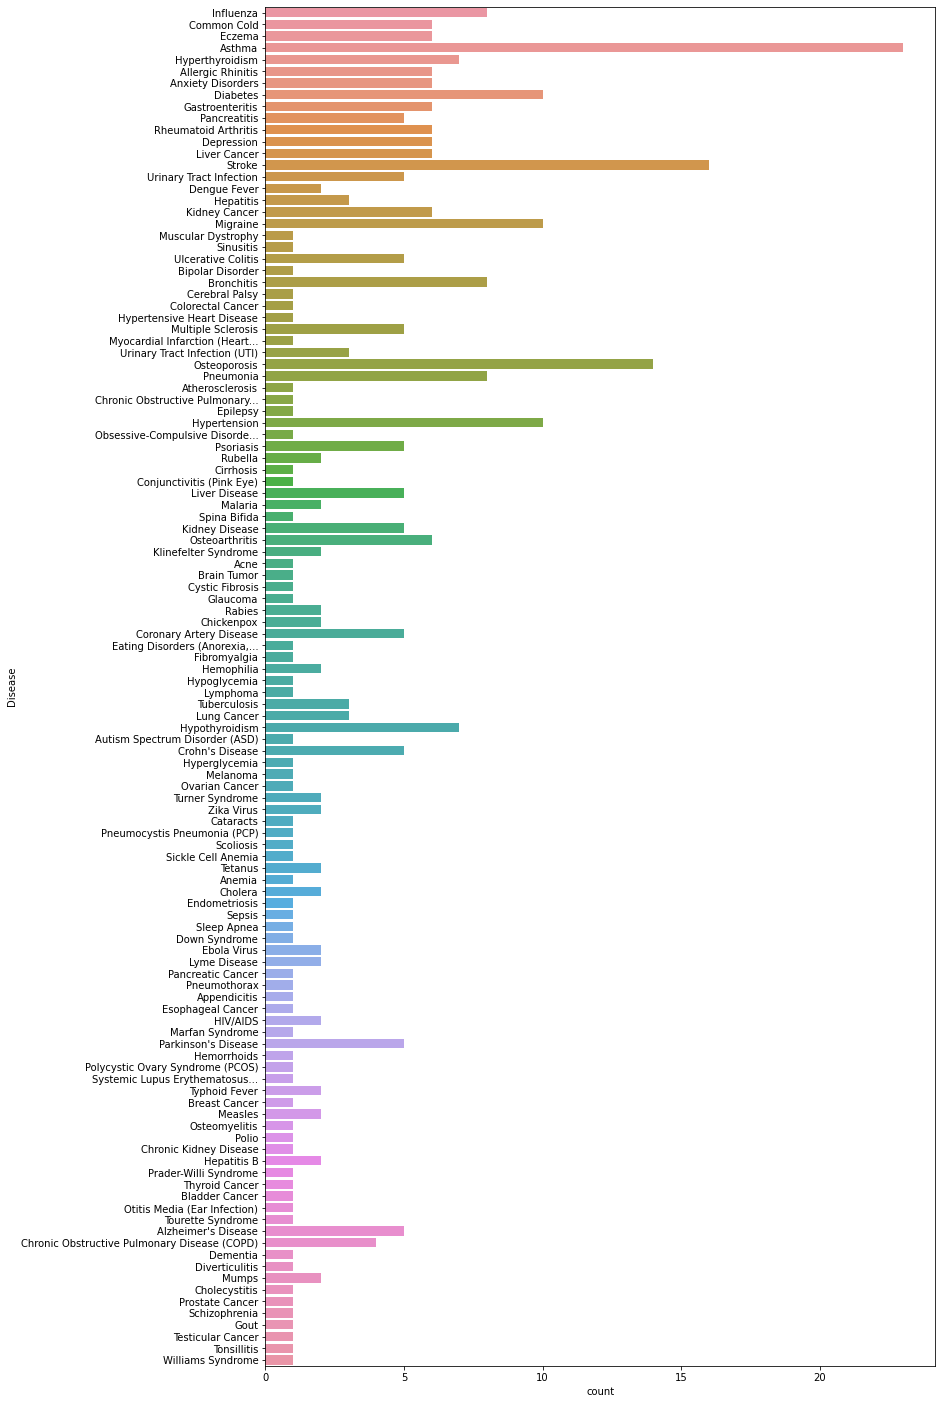

In [9]:
plt.figure(figsize = (12, 25))
sns.countplot(df, y = 'Disease')

In [10]:
df['Fever'].value_counts()

Yes    175
No     174
Name: Fever, dtype: int64

<Axes: xlabel='Fever', ylabel='count'>

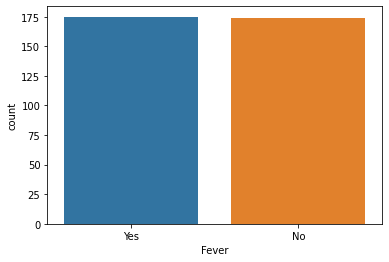

In [11]:
sns.countplot(df, x = 'Fever')

In [12]:
df['Cough'].value_counts()

No     182
Yes    167
Name: Cough, dtype: int64

<Axes: xlabel='Cough', ylabel='count'>

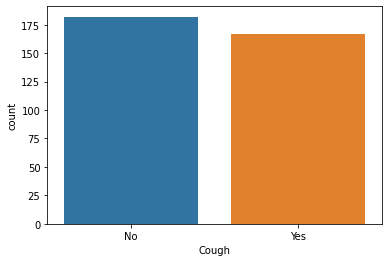

In [13]:
sns.countplot(df, x = 'Cough')

In [14]:
df['Fatigue'].value_counts()

Yes    242
No     107
Name: Fatigue, dtype: int64

<Axes: xlabel='Fatigue', ylabel='count'>

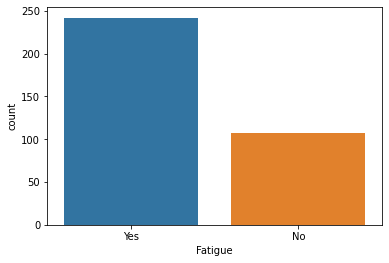

In [15]:
sns.countplot(df, x = 'Fatigue')

In [16]:
df['Difficulty Breathing'].value_counts()

No     261
Yes     88
Name: Difficulty Breathing, dtype: int64

<Axes: xlabel='Difficulty Breathing', ylabel='count'>

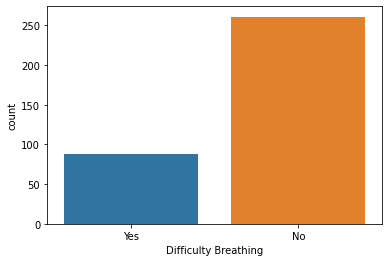

In [17]:
sns.countplot(df, x = 'Difficulty Breathing')

In [18]:
df['Age'].value_counts()

45    42
35    42
50    34
40    31
55    30
60    30
30    28
65    23
42    16
70    16
38    14
29    11
25     7
31     4
48     3
52     3
28     3
85     2
80     2
90     2
57     1
56     1
43     1
39     1
32     1
19     1
Name: Age, dtype: int64

<Axes: xlabel='count', ylabel='Age'>

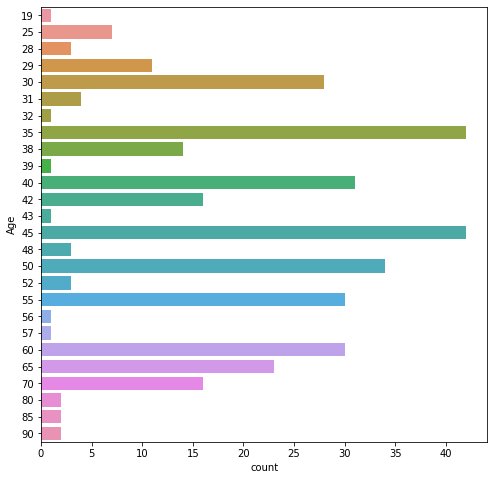

In [19]:
plt.figure(figsize = (8, 8))
sns.countplot(df, y = 'Age')

In [20]:
df['Gender'].value_counts()

Female    176
Male      173
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

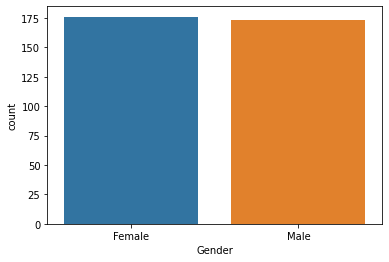

In [21]:
sns.countplot(df, x = 'Gender')

In [22]:
df['Blood Pressure'].value_counts()

High      167
Normal    164
Low        18
Name: Blood Pressure, dtype: int64

<Axes: xlabel='Blood Pressure', ylabel='count'>

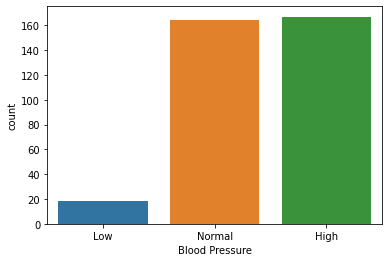

In [23]:
sns.countplot(df, x = 'Blood Pressure')

In [24]:
df['Cholesterol Level'].value_counts()

High      166
Normal    149
Low        34
Name: Cholesterol Level, dtype: int64

<Axes: xlabel='Cholesterol Level', ylabel='count'>

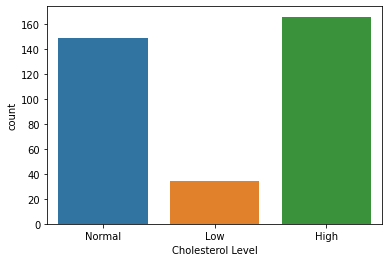

In [25]:
sns.countplot(df, x = 'Cholesterol Level')

In [26]:
df['Outcome Variable'].value_counts()

Positive    186
Negative    163
Name: Outcome Variable, dtype: int64

<Axes: xlabel='Outcome Variable', ylabel='count'>

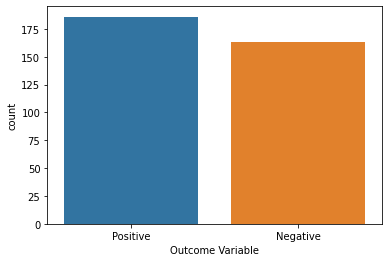

In [27]:
sns.countplot(df, x = 'Outcome Variable')

## Minor Pre-processing for Correlational View

In [28]:
def yes_no_conversion(value) -> int:
    if value == 'Yes':
        return 1
    return 0

In [29]:
df['Fever'] = df['Fever'].apply(yes_no_conversion)
df['Fever'].value_counts()

1    175
0    174
Name: Fever, dtype: int64

In [30]:
df['Cough'] = df['Cough'].apply(yes_no_conversion)
df['Cough'].value_counts()

0    182
1    167
Name: Cough, dtype: int64

In [31]:
df['Fatigue'] = df['Fatigue'].apply(yes_no_conversion)
df['Fatigue'].value_counts()

1    242
0    107
Name: Fatigue, dtype: int64

In [32]:
df['Difficulty Breathing'] = df['Difficulty Breathing'].apply(yes_no_conversion)
df['Difficulty Breathing'].value_counts()

0    261
1     88
Name: Difficulty Breathing, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    int64 
 2   Cough                 349 non-null    int64 
 3   Fatigue               349 non-null    int64 
 4   Difficulty Breathing  349 non-null    int64 
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.4+ KB


In [34]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,Female,Low,Normal,Positive
1,Common Cold,0,1,1,0,25,Female,Normal,Normal,Negative
2,Eczema,0,1,1,0,25,Female,Normal,Normal,Negative
3,Asthma,1,1,0,1,25,Male,Normal,Normal,Positive
4,Asthma,1,1,0,1,25,Male,Normal,Normal,Positive


In [35]:
def low_normal_high_conversion(value) -> int:
    if value == 'Low':
        return 0
    elif value == 'Normal':
        return 1
    return 2

In [36]:
df['Blood Pressure'] = df['Blood Pressure'].apply(low_normal_high_conversion)
df['Blood Pressure'].value_counts()

2    167
1    164
0     18
Name: Blood Pressure, dtype: int64

In [37]:
df['Cholesterol Level'] = df['Cholesterol Level'].apply(low_normal_high_conversion)
df['Cholesterol Level'].value_counts()

2    166
1    149
0     34
Name: Cholesterol Level, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    int64 
 2   Cough                 349 non-null    int64 
 3   Fatigue               349 non-null    int64 
 4   Difficulty Breathing  349 non-null    int64 
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    int64 
 8   Cholesterol Level     349 non-null    int64 
 9   Outcome Variable      349 non-null    object
dtypes: int64(7), object(3)
memory usage: 27.4+ KB


In [39]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,Female,0,1,Positive
1,Common Cold,0,1,1,0,25,Female,1,1,Negative
2,Eczema,0,1,1,0,25,Female,1,1,Negative
3,Asthma,1,1,0,1,25,Male,1,1,Positive
4,Asthma,1,1,0,1,25,Male,1,1,Positive


In [40]:
def assign_diseases(rows) -> dict:
    id = 1
    
    diseases = {}
    
    for row in rows:
        if diseases.get(row, None) == None:
            diseases[row] = id
            id = id + 1
    
    return diseases

In [41]:
disease_ids = assign_diseases(df['Disease'])
disease_ids['Asthma']

4

In [42]:
df['Disease'] = df['Disease'].apply(lambda disease: disease_ids[disease])
df['Disease']

0       1
1       2
2       3
3       4
4       4
       ..
344    14
345    14
346    14
347    14
348    14
Name: Disease, Length: 349, dtype: int64

In [43]:
df['Gender'] = df['Gender'].apply(lambda gender: 1 if gender == 'Male' else 0)
df['Gender']

0      0
1      0
2      0
3      1
4      1
      ..
344    0
345    1
346    1
347    0
348    0
Name: Gender, Length: 349, dtype: int64

In [44]:
df['Outcome Variable'] = df['Outcome Variable'].apply(lambda outcome: 1 if outcome == 'Positive' else 0)
df['Outcome Variable']

0      1
1      0
2      0
3      1
4      1
      ..
344    1
345    1
346    1
347    1
348    1
Name: Outcome Variable, Length: 349, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Disease               349 non-null    int64
 1   Fever                 349 non-null    int64
 2   Cough                 349 non-null    int64
 3   Fatigue               349 non-null    int64
 4   Difficulty Breathing  349 non-null    int64
 5   Age                   349 non-null    int64
 6   Gender                349 non-null    int64
 7   Blood Pressure        349 non-null    int64
 8   Cholesterol Level     349 non-null    int64
 9   Outcome Variable      349 non-null    int64
dtypes: int64(10)
memory usage: 27.4 KB


<Axes: >

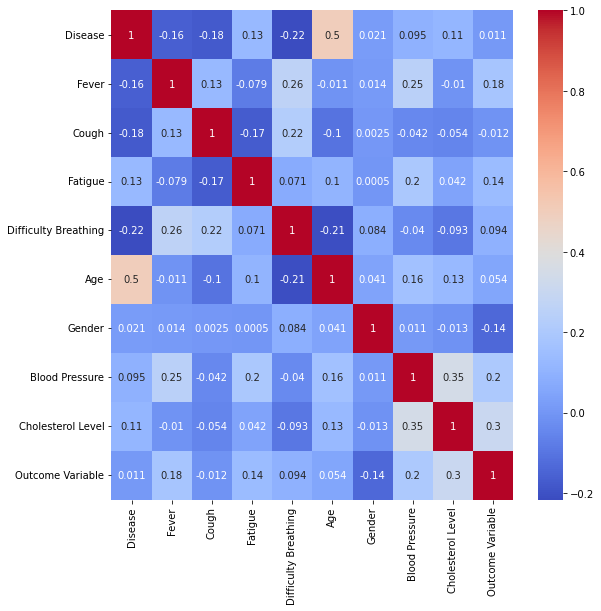

In [46]:
plt.figure(figsize = (9, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# Modeling, Training and Testing

In [47]:
X = df.drop('Outcome Variable', axis = 1)
y = df['Outcome Variable']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

In [49]:
dtc = DecisionTreeClassifier()

In [50]:
rfc = RandomForestClassifier()

In [51]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Decision Tree Results

In [53]:
dtc_predictions = dtc.predict(X_test)
dtc_predictions

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [54]:
print(confusion_matrix(y_test, dtc_predictions))

[[19  8]
 [12 31]]


In [55]:
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.61      0.70      0.66        27
           1       0.79      0.72      0.76        43

    accuracy                           0.71        70
   macro avg       0.70      0.71      0.71        70
weighted avg       0.72      0.71      0.72        70



### Random Forest Results

In [56]:
rfc_predictions = rfc.predict(X_test)
rfc_predictions

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [57]:
print(confusion_matrix(y_test, rfc_predictions))

[[20  7]
 [10 33]]


In [58]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.82      0.77      0.80        43

    accuracy                           0.76        70
   macro avg       0.75      0.75      0.75        70
weighted avg       0.76      0.76      0.76        70

